# 08. Data Preprocessing
## 1. Data Preprocessing
- 데이터의 경우 문제점들이 있다.
 - 결측치
 - 데이터
 - 이상치
 - 데이터형식
 - 범주형데이터

&downarrow;

- 이를 해결하기 위해서 사용되는 대표적인 데이터 전처리 기법
 - Scaling
 - Sampling
 - Dimensionality Reduction
 - Categorical Variable to Numeric Variable

In [74]:
# 필요한 패키지들을 모두 불러온다.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn 

import os # 운영체제와 관련된 패키지도 사용한다.
from os.path import join

* 머신러인 기법인 scikitlearn을 사용한다.

In [92]:
# abalone.txt와 abalone_attributes.txt
# 먹는 전복에 대한 데이터이다.(어떤 상태이면 암놈이고 숫놈인지를 파악하는 것이다.)
# I는 암컷인지 숫컷인지 모르는 상태이다. F는 암컷, M은 숫컷

abalone_path = join('.', 'abalone.txt') # 현재 경로에 있는 abalone.txt이거를 가져온다.
column_path = join('.', 'abalone_attributes.txt')

In [93]:
abalone_path

'./abalone.txt'

In [94]:
abalone_columns = list()

for line in open(column_path):  # column_path 컬럼패스의 줄 하나 하나를 읽어온다.
  abalone_columns.append(line.strip()) # strip()을 사용하게 되면, \n를 없애준다.

abalone_columns

['Sex',
 'Length',
 'Diameter',
 'Height',
 'Whole weight',
 'Shucked weight',
 'Viscera weight',
 'Shell weight',
 'Rings']

In [95]:
data = pd.read_csv(abalone_path, header = None, names = abalone_columns) # 해더 정보는 없다고 None을 해준다.
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [ ]:
label = data['Sex'] # 성별이 라벨로 들어오게 된다.
del data['Sex'] # 성별 컬럼을 데이터에서 제거해준다.

In [ ]:
label

0       M
1       M
2       F
3       M
4       I
       ..
4172    F
4173    M
4174    M
4175    F
4176    M
Name: Sex, Length: 4177, dtype: object

In [ ]:
data

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [ ]:
data.describe()  # 전체 컬럼에 대한 요약 정보를 보여준다.

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


* 가운데 빠진 데이터가 있으면, count에 안 들어 간다.

In [ ]:
data.info() # 각각의 컬럼의 정보를 확인할 수 있다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          4177 non-null   float64
 1   Diameter        4177 non-null   float64
 2   Height          4177 non-null   float64
 3   Whole weight    4177 non-null   float64
 4   Shucked weight  4177 non-null   float64
 5   Viscera weight  4177 non-null   float64
 6   Shell weight    4177 non-null   float64
 7   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 261.2 KB


## 2.1 Scaling

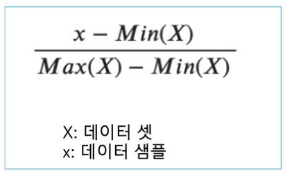

In [ ]:
# Scaling

#data = (data - np.min(data)) / (np.max(data) - np.min(data))
#data

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982,0.500000
1,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261,0.214286
2,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773,0.285714
3,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965,0.321429
4,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313,0.214286
...,...,...,...,...,...,...,...,...
4172,0.662162,0.663866,0.146018,0.313441,0.248151,0.314022,0.246637,0.357143
4173,0.695946,0.647059,0.119469,0.341420,0.294553,0.281764,0.258097,0.321429
4174,0.709459,0.705882,0.181416,0.415796,0.352724,0.377880,0.305431,0.285714
4175,0.743243,0.722689,0.132743,0.386931,0.356422,0.342989,0.293473,0.321429


* 모든게 같은 단위로 만들어 준다.

In [ ]:
from sklearn.preprocessing import MinMaxScaler   # sklearn에서 MinMaxScaler를 불러온다.

mMscaler = MinMaxScaler() # 변수를 가져온다.
# fit() # 데이터를 입어보는 것
#mMscaler.fit(data)
# transfrom # 데이터를 변환하는 것
#mScaled_data = mMscaler.transform(data)
mScaled_data = mMscaler.fit_transform(data)
mScaled_data

array([[0.51351351, 0.5210084 , 0.0840708 , ..., 0.1323239 , 0.14798206,
        0.5       ],
       [0.37162162, 0.35294118, 0.07964602, ..., 0.06319947, 0.06826109,
        0.21428571],
       [0.61486486, 0.61344538, 0.11946903, ..., 0.18564845, 0.2077728 ,
        0.28571429],
       ...,
       [0.70945946, 0.70588235, 0.18141593, ..., 0.37788018, 0.30543099,
        0.28571429],
       [0.74324324, 0.72268908, 0.13274336, ..., 0.34298881, 0.29347285,
        0.32142857],
       [0.85810811, 0.84033613, 0.17256637, ..., 0.49506254, 0.49177877,
        0.39285714]])

In [ ]:
mScaled_data = pd.DataFrame(mScaled_data, columns = data.columns)  # 위에 처럼 데이터가 보이기 때문에 데이터가 보기 편하게 DataFrame으로 해준다.
mScaled_data

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982,0.500000
1,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261,0.214286
2,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773,0.285714
3,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965,0.321429
4,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313,0.214286
...,...,...,...,...,...,...,...,...
4172,0.662162,0.663866,0.146018,0.313441,0.248151,0.314022,0.246637,0.357143
4173,0.695946,0.647059,0.119469,0.341420,0.294553,0.281764,0.258097,0.321429
4174,0.709459,0.705882,0.181416,0.415796,0.352724,0.377880,0.305431,0.285714
4175,0.743243,0.722689,0.132743,0.386931,0.356422,0.342989,0.293473,0.321429


## 2.2 Standard Scaling

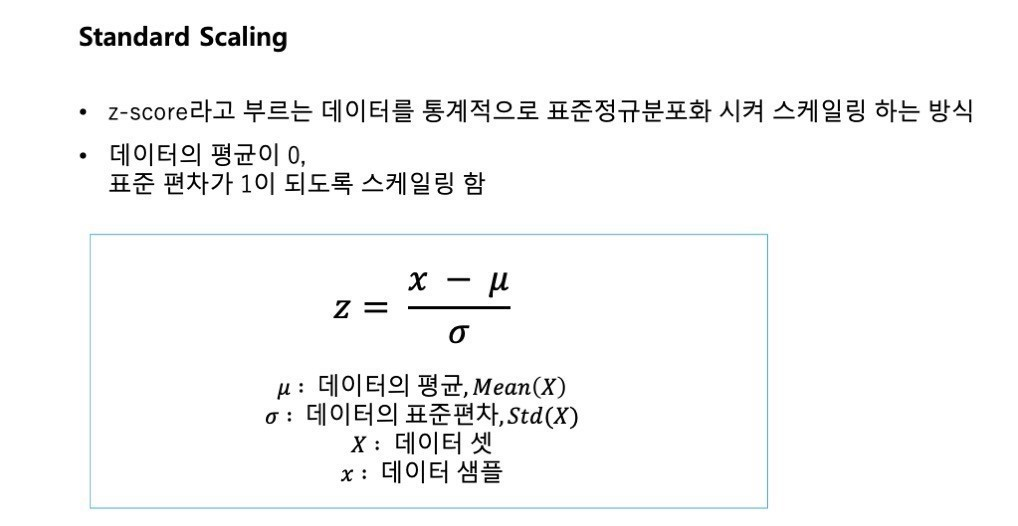

In [ ]:
from sklearn.preprocessing import StandardScaler
sdscaler = StandardScaler()

sdscaled_data = sdscaler.fit_transform(data)
sdscaled_data

array([[-0.57455813, -0.43214879, -1.06442415, ..., -0.72621157,
        -0.63821689,  1.57154357],
       [-1.44898585, -1.439929  , -1.18397831, ..., -1.20522124,
        -1.21298732, -0.91001299],
       [ 0.05003309,  0.12213032, -0.10799087, ..., -0.35668983,
        -0.20713907, -0.28962385],
       ...,
       [ 0.6329849 ,  0.67640943,  1.56576738, ...,  0.97541324,
         0.49695471, -0.28962385],
       [ 0.84118198,  0.77718745,  0.25067161, ...,  0.73362741,
         0.41073914,  0.02057072],
       [ 1.54905203,  1.48263359,  1.32665906, ...,  1.78744868,
         1.84048058,  0.64095986]])

In [ ]:
sdscaled_data = pd.DataFrame(sdscaled_data, columns = data.columns)
sdscaled_data

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,1.571544
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.910013
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,-0.289624
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0.020571
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.910013
...,...,...,...,...,...,...,...,...
4172,0.341509,0.424464,0.609334,0.118813,0.047908,0.532900,0.073062,0.330765
4173,0.549706,0.323686,-0.107991,0.279929,0.358808,0.309362,0.155685,0.020571
4174,0.632985,0.676409,1.565767,0.708212,0.748559,0.975413,0.496955,-0.289624
4175,0.841182,0.777187,0.250672,0.541998,0.773341,0.733627,0.410739,0.020571


## 3. Sampling

In [ ]:
# Sampling

from imblearn.over_sampling import RandomOverSampler # 샘플링하기 위한 기법들이 들어가 있다.
from imblearn.under_sampling import RandomUnderSampler

ros = RandomOverSampler()
rus = RandomUnderSampler()

In [ ]:
oversampled_data, oversampled_label = ros.fit_resample(data, label)
undersampled_data, undersampled_label = rus.fit_resample(data, label)

# numpy로 되어 있어서 pandas로 바꾼다.
oversampled_data = pd.DataFrame(oversampled_data, columns = data.columns)
undersampled_data = pd.DataFrame(undersampled_data, columns = data.columns)

* 이렇게하면 오버샘플과 언더샘플을 할 수 있다.

In [ ]:
print('원본 데이터의 클래스 비율: \n{}'.format(pd.get_dummies(label).sum()))
print('Oversample 데이터의 클래스 비율: \n{}'.format(pd.get_dummies(oversampled_label).sum()))
print('Undersample 데이터의 클래스 비율: \n{}'.format(pd.get_dummies(undersampled_label).sum()))

원본 데이터의 클래스 비율: 
F    1307
I    1342
M    1528
dtype: int64
Oversample 데이터의 클래스 비율: 
F    1528
I    1528
M    1528
dtype: int64
Undersample 데이터의 클래스 비율: 
F    1307
I    1307
M    1307
dtype: int64


* get_dummies(label) 라벨 안에 있는 가지수를 표현해준다.

## 3.1 SMOTE

In [ ]:
from sklearn.datasets import make_classification  # 샘플데이터를 생성해준다.
data, label = make_classification(n_samples=1000,
                    n_features=2,
                    n_redundant=0,
                    n_informative=2,
                    n_repeated=0,
                    n_classes=3,
                    n_clusters_per_class=1,
                    weights=[0.05,0.15,0.8],
                    class_sep=0.8,
                    random_state=2019) # weigths으로 가중치를 준다.

* data하고 label이 생성이 된다.

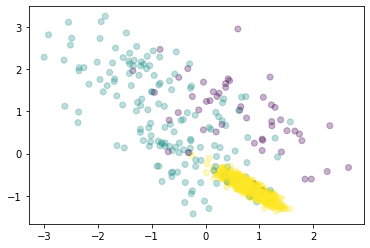

In [ ]:
fig = plt.Figure(figsize = (12, 6))
plt.scatter(data[:, 0], data[:, 1], c = label, alpha = 0.3) # 데이터에서 영번째 데이터가 x좌표이다., 데이터에서 첫번째 데이터가 y좌표이다.

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [ ]:
smoted_data, smoted_label = smote.fit_resample(data, label)

print('원본 데이터의 클래스 비율 \n{}'.format(pd.get_dummies(label).sum()))
print('\nSMOTE 결과 \n{}'.format(pd.get_dummies(smoted_label).sum()))

원본 데이터의 클래스 비율 
0     53
1    154
2    793
dtype: int64

SMOTE 결과 
0    793
1    793
2    793
dtype: int64


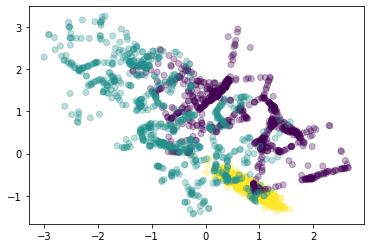

In [ ]:
fig = plt.Figure(figsize = (12, 6))
plt.scatter(smoted_data[:, 0], smoted_data[:, 1], c = smoted_label, alpha = 0.3)

## 4. 차원의 축소

In [62]:
from sklearn.datasets import load_digits
digits = load_digits()

In [ ]:
print(digits.DESCR)  # 데이터에 대한 descripts에 대한 정보를 가지고 있다.

In [65]:
data = digits.data # 손글씨 데이터가 들어가 있다.
label = digits.target

* 필요한 데이터들을 가지고 온다.

In [66]:
data.shape

(1797, 64)

* 1797개의 64개의 정보량이 들어가 있다.

In [69]:
label.shape  # 하나짜리 데이터이고 1797개가 있다.

(1797,)

In [72]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [71]:
data[0].reshape(8, 8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

* resahpe을 사용해서 8, 8로 재 조정해준다.

In [73]:
label[0]

0

Label: 0


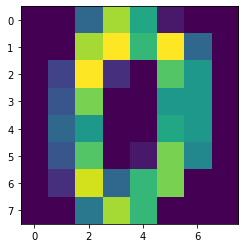

In [76]:
plt.imshow(data[0].reshape(8, 8))  # 픽셀 정보를 가지고 이미지를 출력해준다.
print('Label: {}'.format(label[0])) # label의 0번째의 숫자를 print해준다.

* 데이터를 재구성해준다.



In [79]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)

In [80]:
new_data = pca.fit_transform(data) # 데이터를 넣어준다.

In [81]:
print('원본 데이터의 차원 \n{}'.format(data.shape))  # 원본 데이터의 차원이다.
print('PCA를 거친 데이터의 차원 \n{}'.format(new_data.shape))

원본 데이터의 차원 
(1797, 64)
PCA를 거친 데이터의 차원 
(1797, 2)


In [82]:
new_data[0]

array([-1.25947085, 21.27488576])

In [83]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

* data[0]는 특성 변수가 64개가 된다. 그래서 컴퓨터는 64차원이 된다.
* new_data[0]는 컴퓨터는 2개의 차원으로 인식한다.

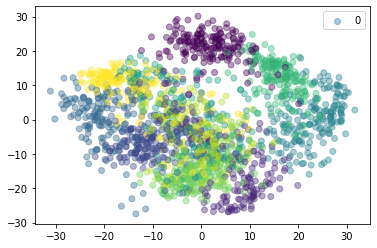

In [91]:
plt.scatter(new_data[:, 0], new_data[:, 1], c = label, alpha = 0.4)
plt.legend(label)

# 5. Categorical Variable to Numeric Variable

## 5.1 Label Encoding

In [96]:
data = pd.read_csv(abalone_path, header = None, names = abalone_columns)

In [97]:
label = data['Sex']

* 있는 기능을 사용해주는게 좋다.

In [98]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [99]:
type(label)  # 라벨의 값은 시리즈의 값으로 되어 있다는 것을 알 수 있다.

pandas.core.series.Series

In [100]:
label

0       M
1       M
2       F
3       M
4       I
       ..
4172    F
4173    M
4174    M
4175    F
4176    M
Name: Sex, Length: 4177, dtype: object

In [103]:
label_encoded_label = le.fit_transform(label)
label_encoded_label

array([2, 2, 0, ..., 2, 0, 2])

## 5.2 One-Hot Encoding


In [109]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse = False) # sparse는 기본 값으로 True로 되어 있다.

one_hot_encoded = ohe.fit_transform(label.values.reshape(-1, 1))

In [110]:
one_hot_encoded

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

* One_Hot Encoding을 사용해서 3차원으로 표시해 놓은 것을 알 수 있다.

# End